In [35]:
import numpy as np
from scipy.stats import norm
import sklearn
from sklearn.datasets.samples_generator import make_blobs
import pandas as pd

In [36]:
np.random.seed(2)

In [37]:
x, y = make_blobs(n_samples=1000,n_features=2,centers=1)

In [38]:
x.shape

(1000, 2)

In [39]:
y.shape

(1000,)

In [40]:
print(type(x))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [41]:
## easy function avaliable in sklearn
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(x,y)

xtest = [x[0]]
ytest = y[0]

predict = model.predict(xtest)

xprob = model.predict_proba(xtest)

print("Predictied probabilites ",xprob)

print("Actual value ",ytest)
print("Predicted value ",predict)

Predictied probabilites  [[1.]]
Actual value  0
Predicted value  [0]


In [42]:
import matplotlib.pyplot as plt

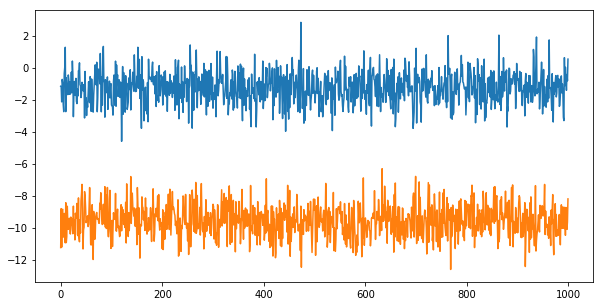

In [46]:
plt.figure(figsize=(10,5))
plt.plot(x)

In [85]:
## lets create our own classifier

def probability_distribution(data):
    mu = np.mean(data)
    std = np.std(data)
    print(mu,std)
    dist = norm(mu,std)
    print(dist)
    return dist

In [48]:
def independent_conditional_probability(x,prior_prob,dist1,dist2):
    return prior_prob * dist1.pdf(x[0]) * dist2.pdf(x[1])

In [68]:
## here we sort our classes 

x, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1)

xy0 = x[y==0]
xy1 = x[y==1]

In [69]:
xy0.shape

(500, 2)

In [70]:
xy1.shape

(500, 2)

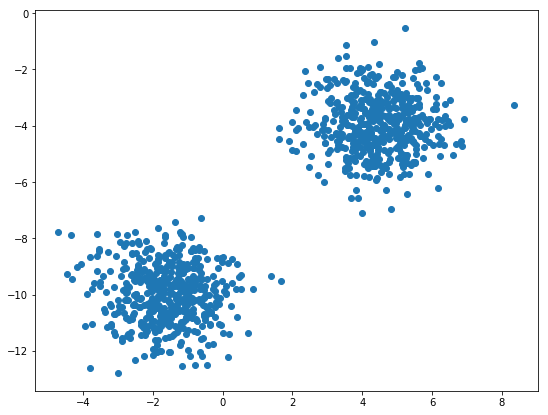

In [82]:
plt.figure(figsize=(9,7))
plt.scatter(xy0,xy1)

In [83]:
## lets calculate prior probability

prior_prob0 = len(xy0) / len(x)
prior_prob1 = len(xy1) / len(x)

In [86]:
## creating probability distribution features
## for y == 0
distx1y0 = probability_distribution(xy0[:, 0])
distx2y0 = probability_distribution(xy0[:, 1])
##################################################
## for y == 1
distx1y1 = probability_distribution(xy1[:, 0])
distx2y1 = probability_distribution(xy1[:, 1])

-1.616350186158042 0.9744285599717664
4.433708434123033 0.9907006409390755
-9.964188211676749 1.038940594951933
-3.925593838250244 1.015316673206324


In [87]:
xtest, ytest = x[0],y[0]

In [91]:
py0 = independent_conditional_probability(xtest, prior_prob0, distx1y0, distx2y0)
py1 = independent_conditional_probability(xtest, prior_prob1, distx1y1, distx2y1)
print('P(y=0 | %s) = %.3f' % (xtest, py0*100))
print('P(y=1 | %s) = %.3f' % (xtest, py1*100))
print('Truth: y=%d' % ytest)

P(y=0 | [-3.05837272  4.48825769]) = 2.754
P(y=1 | [-3.05837272  4.48825769]) = 0.000
Truth: y=0
